https://medium.com/@mars_escobin/how-to-explore-datasets-for-beginners-8ee30acb0d3
https://datascientyst.com/exploratory-data-analysis-pandas-examples/
https://www.geeksforgeeks.org/count-nan-or-missing-values-in-pandas-dataframe/

In [65]:
# import needed libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [13]:
# import the dataset from a CSV saved in the folder 
# https://www.datacamp.com/tutorial/pandas-read-csv
df = pd.read_csv("PlantGrowth.csv")

In [56]:
# Display the first few rows of the dataset to understand its structure
print("==== First 5 line of the dataset ==== \n \n")
print(str(df.head()))

==== First 5 line of the dataset ==== 
 

   rownames  weight group
0         1    4.17  ctrl
1         2    5.58  ctrl
2         3    5.18  ctrl
3         4    6.11  ctrl
4         5    4.50  ctrl


In [61]:
# Assuming df is your DataFrame (e.g., "iris" dataset)
print("==== Shape of the dataset ==== \n")
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')
print(f'Size: {df.size}\n')
print(f"Columns: {', '.join(df.columns)}\n")

# Check the value counts for the 'group' column (similar to "Species" in the example)
print("==== Value counts for the 'group' column ==== \n")
print(df['group'].value_counts())

==== Shape of the dataset ==== 

Number of rows: 30
Number of columns: 3
Size: 90

Columns: rownames, weight, group

==== Value counts for the 'group' column ==== 

group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64


In [60]:
# Check for missing values in the DataFrame
print("==== Checking missing value ==== \n")
missing_count = df.isna().sum()

print (missing_count)

# Check if there are any missing values in the entire DataFrame
if missing_count.any():
    print("\nThere are missing values in the DataFrame.")
    print(missing_count)
else:
    print("\nThere are no missing values in the DataFrame.")

==== Checking missing value ==== 

rownames    0
weight      0
group       0
dtype: int64

There are no missing values in the DataFrame.


In [26]:
# Check for duplicates
duplicates = df[df.duplicated()]

# Print whether duplicates exist and if so, display them
if duplicates.empty:
    print("No duplicates found in the dataset.")
else:
    print(f"Found {len(duplicates)} duplicate rows.")
    print(duplicates)

No duplicates found in the dataset.


In [27]:
# Check the basic structure and summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [39]:
to_explore = df['group']  # Select the 'group' column
result = type(to_explore[1])  # Get the type of the element at index 1

# Improved print statement
print(f"The type of the 'group' is: {result}.")

The type of the 'group' is: <class 'str'>.


In [37]:
df.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


In [40]:
df.describe(include='object')

,group
count,30
unique,3
top,ctrl
freq,10


In [43]:
df.nunique()

rownames    30
weight      29
group        3
dtype: int64

In [44]:
df.group.nunique()

3

In [58]:
print("==== Print unique value of Group ==== \n")
print("Group")
print("-------")
unique_g = df.group.unique()
for g in unique_g:
        print(g)


==== Print unique value of Group ==== 

Group
-------
ctrl
trt1
trt2


In [46]:
df.group.value_counts(dropna=False)

group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64

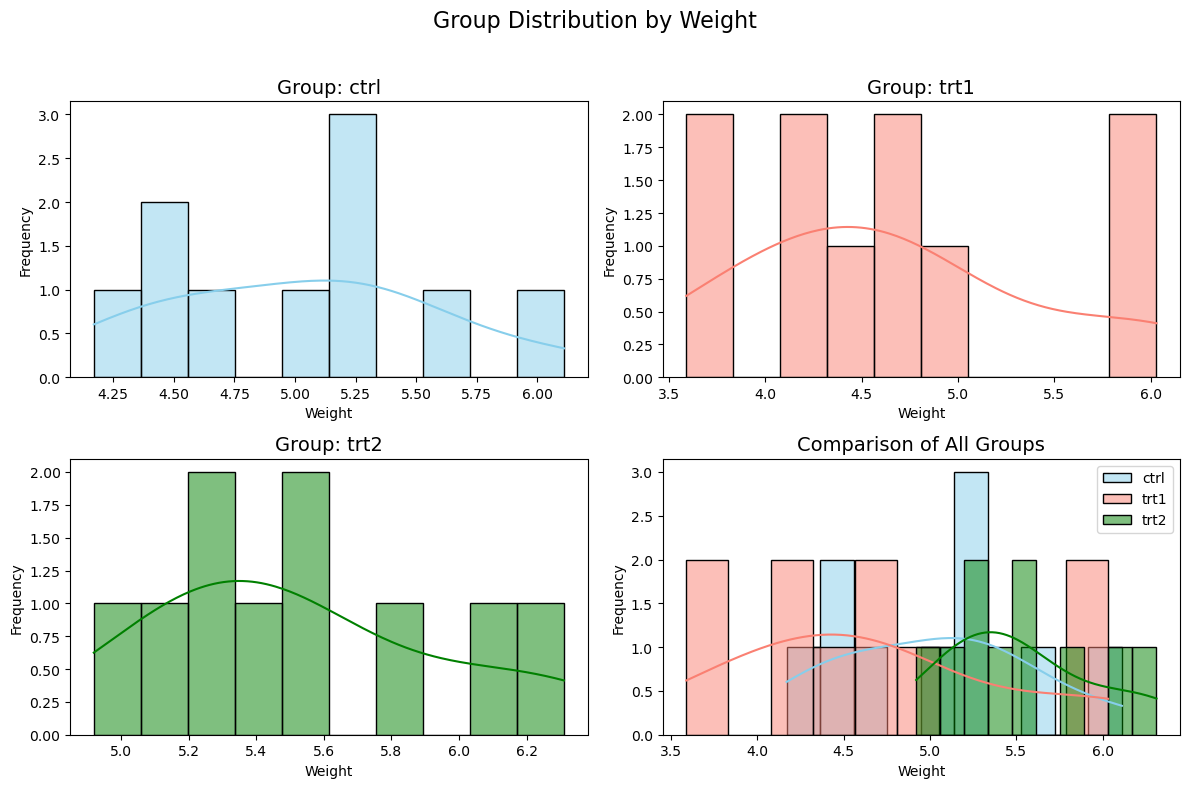

In [68]:
# Set up the figure with 2 rows and 2 columns (4 subplots in total)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Set the title for the entire figure
plt.suptitle('Group Distribution by Weight', fontsize=16)

# Plot 1: Histogram for the 'ctrl' group
sns.histplot(df[df['group'] == 'ctrl']['weight'], kde=True, color='skyblue', bins=10, ax=axs[0, 0], edgecolor='black')
axs[0, 0].set_title('Group: ctrl', fontsize=14)
axs[0, 0].set_xlabel('Weight')
axs[0, 0].set_ylabel('Frequency')

# Plot 2: Histogram for the 'trt1' group
sns.histplot(df[df['group'] == 'trt1']['weight'], kde=True, color='salmon', bins=10, ax=axs[0, 1], edgecolor='black')
axs[0, 1].set_title('Group: trt1', fontsize=14)
axs[0, 1].set_xlabel('Weight')
axs[0, 1].set_ylabel('Frequency')

# Plot 3: Histogram for the 'trt2' group
sns.histplot(df[df['group'] == 'trt2']['weight'], kde=True, color='green', bins=10, ax=axs[1, 0], edgecolor='black')
axs[1, 0].set_title('Group: trt2', fontsize=14)
axs[1, 0].set_xlabel('Weight')
axs[1, 0].set_ylabel('Frequency')

# Plot 4: Overlapping histograms for all groups
sns.histplot(df[df['group'] == 'ctrl']['weight'], kde=True, color='skyblue', bins=10, ax=axs[1, 1], label='ctrl', edgecolor='black')
sns.histplot(df[df['group'] == 'trt1']['weight'], kde=True, color='salmon', bins=10, ax=axs[1, 1], label='trt1', edgecolor='black')
sns.histplot(df[df['group'] == 'trt2']['weight'], kde=True, color='green', bins=10, ax=axs[1, 1], label='trt2', edgecolor='black')
axs[1, 1].set_title('Comparison of All Groups', fontsize=14)
axs[1, 1].set_xlabel('Weight')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].legend()  # Add a legend to differentiate the groups

# Adjust the layout to prevent overlapping of elements
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to leave space for the main title

# Show the plot
plt.show()

In [70]:
ctrl_d = df[df['group'] == 'ctrl']['weight']
trt1_d = df[df['group'] == 'trt1']['weight']
trt2_d = df[df['group'] == 'trt2']['weight']

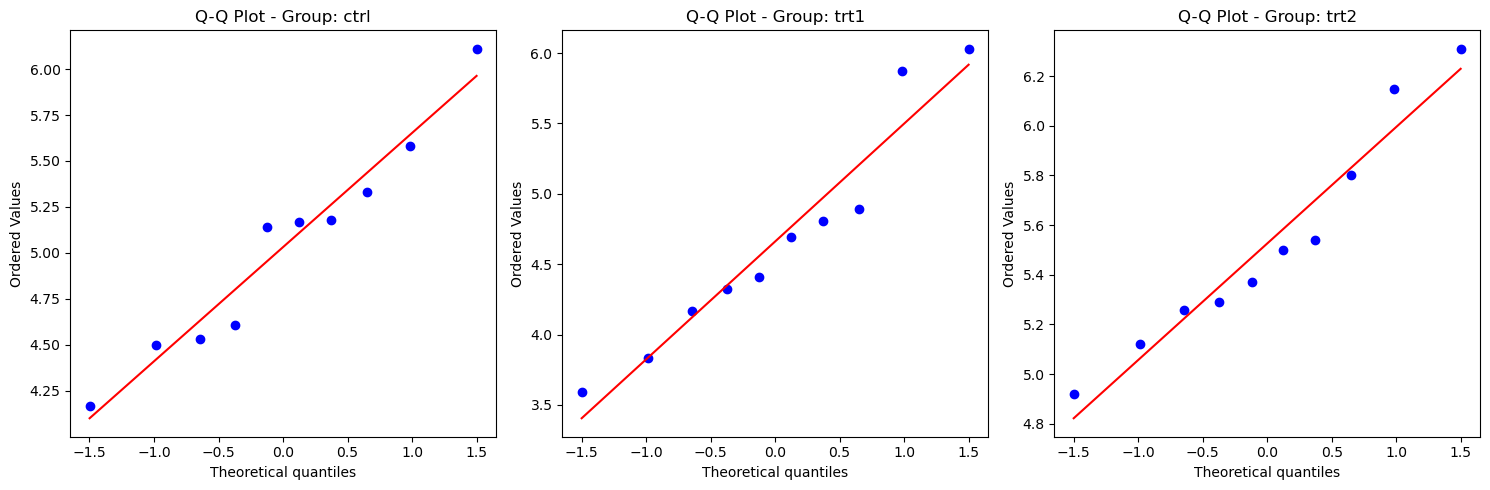

In [71]:
# Set up the figure with 1 row and 3 columns (for each group)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Create Q-Q plot for 'ctrl' group
stats.probplot(ctrl_d, dist='norm', plot=axs[0])
axs[0].set_title('Q-Q Plot - Group: ctrl')

# Create Q-Q plot for 'trt1' group
stats.probplot(trt1_d, dist='norm', plot=axs[1])
axs[1].set_title('Q-Q Plot - Group: trt1')

# Create Q-Q plot for 'trt2' group
stats.probplot(trt2_d, dist='norm', plot=axs[2])
axs[2].set_title('Q-Q Plot - Group: trt2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [93]:
import pandas as pd
from scipy import stats
from tabulate import tabulate

# Sample DataFrame (replace this with your actual data)
# df = pd.read_csv("your_data.csv")  # example for reading the data

# Define the significance level
alpha = 0.05  # significance level

# Initialize lists to hold the results for both tests
results_shapiro = []
results_ks = []

# Perform the Shapiro-Wilk and Kolmogorov-Smirnov tests for each group
for group_name in ['ctrl', 'trt1', 'trt2']:
    # Filter the DataFrame to get the weight data for each group
    group_data = df[df['group'] == group_name]['weight']
    
    # Perform the Shapiro-Wilk test
    shapiro_stat, p_value_shapiro = stats.shapiro(group_data)
    p_value_shapiro = round(p_value_shapiro, 3)
    result_shapiro = "YES: The data is not normally distributed." if p_value_shapiro < alpha else "NO: The data may be normally distributed."
    results_shapiro.append([group_name, p_value_shapiro, result_shapiro])
    
    # Perform the Kolmogorov-Smirnov test against a normal distribution
    mean = group_data.mean()
    std = group_data.std()
    ks_stat, p_value_ks = stats.kstest(group_data, 'norm', args=(mean, std))
    p_value_ks = round(p_value_ks, 3)
    result_ks = "YES: The data is not normally distributed." if p_value_ks < alpha else "NO: The data may be normally distributed."
    results_ks.append([group_name, p_value_ks, result_ks])

# Use tabulate to format the results for better presentation
headers = ['Group', 'P-value', 'Reject the null hypothesis?']

# Print the results with headers for both tests
print("==== Shapiro-Wilk Test ====")
table_shapiro = tabulate(results_shapiro, headers=headers, tablefmt='pretty')
print(table_shapiro)

print("\n==== Kolmogorov-Smirnov Test ====")
table_ks = tabulate(results_ks, headers=headers, tablefmt='pretty')
print(table_ks)

==== Shapiro-Wilk Test ====
+-------+---------+-------------------------------------------+
| Group | P-value |        Reject the null hypothesis?        |
+-------+---------+-------------------------------------------+
| ctrl  |  0.747  | NO: The data may be normally distributed. |
| trt1  |  0.452  | NO: The data may be normally distributed. |
| trt2  |  0.564  | NO: The data may be normally distributed. |
+-------+---------+-------------------------------------------+

==== Kolmogorov-Smirnov Test ====
+-------+---------+-------------------------------------------+
| Group | P-value |        Reject the null hypothesis?        |
+-------+---------+-------------------------------------------+
| ctrl  |  0.876  | NO: The data may be normally distributed. |
| trt1  |  0.817  | NO: The data may be normally distributed. |
| trt2  |  0.812  | NO: The data may be normally distributed. |
+-------+---------+-------------------------------------------+


0    4.17
1    5.58
2    5.18
3    6.11
4    4.50
5    4.61
6    5.17
7    4.53
8    5.33
9    5.14
Name: weight, dtype: float64


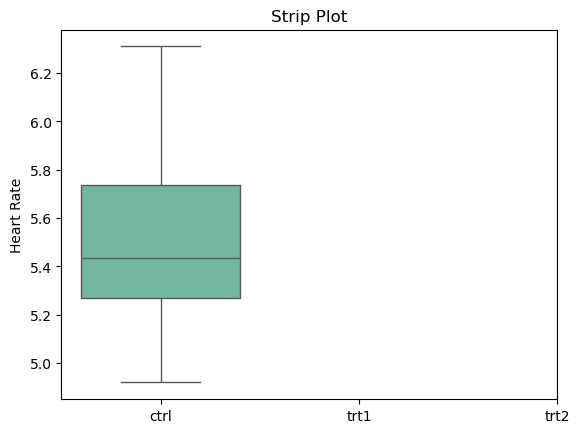

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has the columns 'group' and 'weight'
# Example of how to filter the groups from your DataFrame
ctrl_d = df[df['group'] == 'ctrl']['weight']
trt1_d = df[df['group'] == 'trt1']['weight']
trt2_d = df[df['group'] == 'trt2']['weight']
print(ctrl_d)

# Create a list of data to be passed to the boxplot function
data = [ctrl_d, trt1_d, trt2_d]

# Create the boxplot
ax = sns.boxplot(data=data, palette='Set2')
ax.set_title('Strip Plot', fontsize=12)  
ax.set_ylabel('Heart Rate') 
ax.set_xticks([0, 1, 2])  # Set tick positions on the x-axis at 0 and 1
ax.set_xticklabels(['ctrl', 'trt1', 'trt2'])  # Set custom labels for the x-axis ticks


# Show the plot
plt.show()


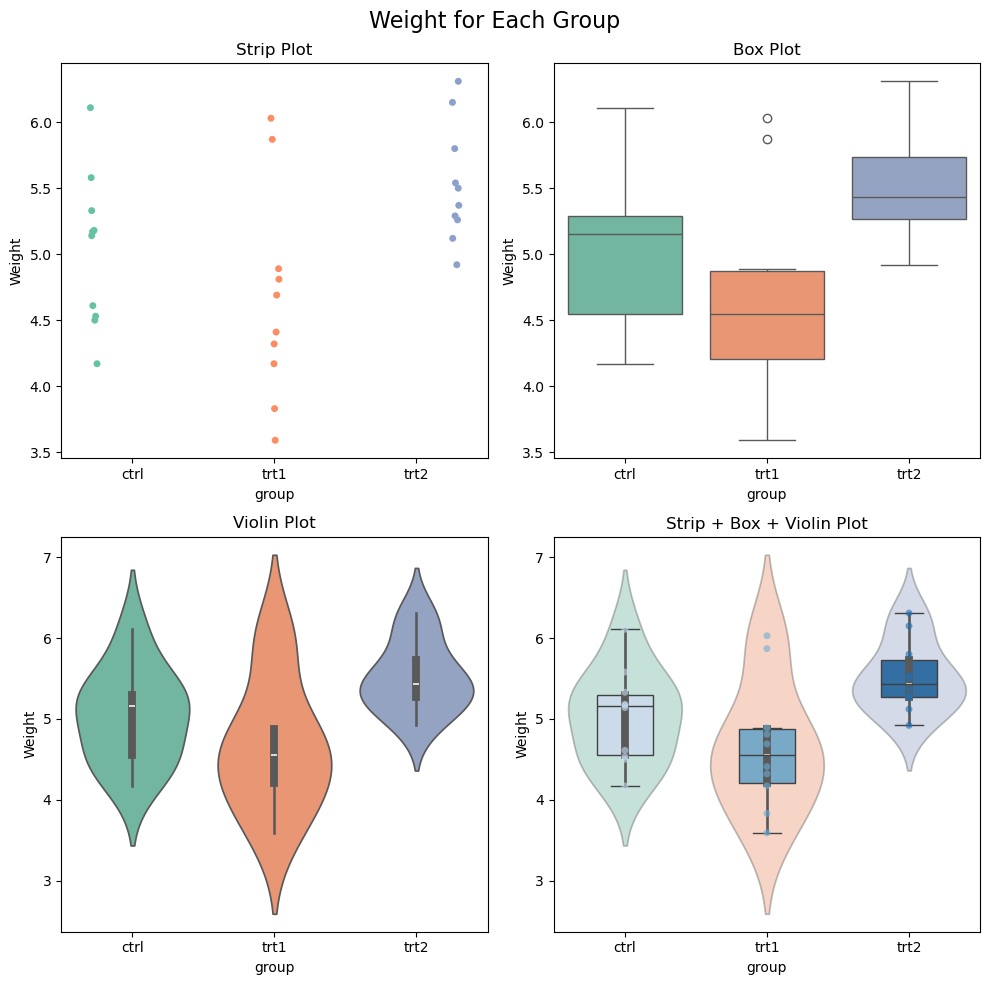

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has the columns 'group' and 'weight'

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Adjusted the size for horizontal layout
plt.suptitle('Weight for Each Group', fontsize=16)  # Adds a title for the whole figure

# Plot 1: Strip plot
sns.stripplot(x='group', y='weight', hue='group', data=df, palette='Set2', jitter=True, ax=axs[0][0], dodge=True)
axs[0][0].set_title('Strip Plot', fontsize=12)
axs[0][0].set_ylabel('Weight', fontsize=10)  # Set y-axis label

# Plot 2: Boxplot
sns.boxplot(x='group', y='weight', hue='group', data=df, palette='Set2', ax=axs[0][1])
axs[0][1].set_title('Box Plot', fontsize=12)
axs[0][1].set_ylabel('Weight', fontsize=10)  # Set y-axis label

# Plot 3: Violin Plot
sns.violinplot(x='group', y='weight', hue='group', data=df, palette='Set2', ax=axs[1][0])
axs[1][0].set_title('Violin Plot', fontsize=12)
axs[1][0].set_ylabel('Weight', fontsize=10)  # Set y-axis label

# Plot 4: Combined Strip, Box and Violin Plot
sns.stripplot(x='group', y='weight', hue='group', data=df, palette='Blues', jitter=False, dodge=False, ax=axs[1][1], alpha=0.6)
sns.boxplot(x='group', y='weight', hue='group', data=df, palette='Blues', ax=axs[1][1], width=0.4, fliersize=0, color='black')  
sns.violinplot(x='group', y='weight', hue='group', data=df, palette='Set2', ax=axs[1][1], alpha=0.4)
axs[1][1].set_title('Strip + Box + Violin Plot', fontsize=12)
axs[1][1].set_ylabel('Weight', fontsize=10)  # Set y-axis label


# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()


C:\Users\anton\AppData\Local\Temp\ipykernel_23936\2114319064.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='group', y='weight', data=df, palette='Set2')


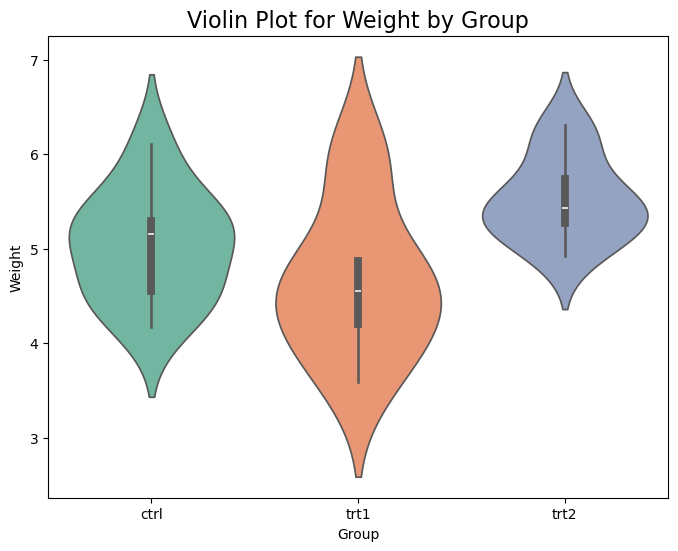

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has the columns 'group' and 'weight'

# Create a figure for the violin plot
plt.figure(figsize=(8, 6))

# Create the violin plot for the groups
sns.violinplot(x='group', y='weight', data=df, palette='Set2')

# Set title and labels
plt.title('Violin Plot for Weight by Group', fontsize=16)
plt.ylabel('Weight')
plt.xlabel('Group')

# Show the plot
plt.show()

## The Lady Tasting Tea Experiment

This task is inspired by **The Lady Tasting Tea** experiment conducted by Ronald Fisher. The experiment was sparked by a claim made by a lady named Muriel Bristol, who asserted that she could tell whether milk or tea was added first to a cup. To test Muriel's claim, Fisher designed an experiment using 8 cups: 4 with milk added first and 4 with tea added first, arranged randomly. Fisher aimed to test the **null hypothesis (H₀)**, which stated that Muriel could not distinguish between the two methods and that any correct identification would be purely due to random chance.

### Total Possible Arrangements

The first step in the **Lady Tasting Tea** experiment is to calculate the total number of ways to arrange the 8 cups. There are 8 cups in total: 4 with milk added first, and 4 with tea added first. This is a **combination** problem, as we are choosing which 4 out of the 8 cups will have milk added first, without regard to the order of arrangement.

The combination formula is:

$$
\binom{n}{k} = \frac{n!}{k!(n-k)!}
$$

For \( n = 8 \) and \( k = 4 \), the number of combinations is:

$$
\binom{8}{4} = \frac{8!}{4!(8-4)!} = \frac{8 \times 7 \times 6 \times 5}{4 \times 3 \times 2 \times 1} = 70
$$

Thus, there are **70 possible ways** to arrange the 8 cups with 4 cups of milk-first and 4 cups of tea-first.

### Testing the Null Hypothesis (H₀)

Fisher wanted to test whether Muriel’s ability to correctly identify the cups was due to chance or if it was statistically significant. Under the **null hypothesis (H₀)**, we assume that Muriel cannot distinguish between the two methods, meaning her guesses are random. Therefore, the probability of guessing a milk-first cup correctly is:

$$dd
P(\text{correct}) = \frac{4}{8} = 0.5
$$

Since there are 4 cups with milk first and 4 cups with tea first, her chance of guessing correctly for each cup is 50%.

### Binomial Distribution

The probability of Muriel making exactly **k** correct guesses out of 4 can be calculated using the **binomial distribution**, which models the probability of a certain number of successes (correct guesses) in a fixed number of independent trials (the 4 cups). The binomial distribution formula is:

$$
P(k) = \binom{4}{k} \left(\frac{1}{2}\right)^4
$$

Where:
- \( P(k) \) is the probability of Muriel making exactly \( k \) correct guesses out of 4 cups,
- \( \binom{4}{k} \) is the number of ways to choose \( k \) correct cups from the 4,
- \( \left(\frac{1}{2}\right)^4 \) represents the probability of guessing correctly 4 times, since each guess has a 50% chance of being correct.

The possible values for \( k \) are 0, 1, 2, 3, or 4, meaning we can calculate the probability of getting 0, 1, 2, 3, or 4 correct guesses out of 4.

For example, the probability of guessing **0** correct cups is:

$$
P(0) = \binom{4}{0} \left(\frac{1}{2}\right)^4 = 1 \times \frac{1}{16} = 0.0625
$$

Similarly, we can calculate the probability for each value of \( k \):

- \( P(0) = 0.0625 \) (6.25% chance of getting 0 correct guesses)
- \( P(1) = 0.25 \) (25% chance of getting 1 correct guess)
- \( P(2) = 0.375 \) (37.5% chance of getting 2 correct guesses)
- \( P(3) = 0.25 \) (25% chance of getting 3 correct guesses)
- \( P(4) = 0.0625 \) (6.25% chance of getting 4 correct guesses)

### Conclusion

Based on Fisher's analysis, assuming the conventional probability criterion of less than 5%, the critical region for rejecting the null hypothesis of no ability to distinguish was the case of getting **4 correct guesses** out of 4. This is the critical region because, under the null hypothesis, the probability of getting 4 correct guesses is:

$$
P(\text{4 correct}) = \frac{1}{70} \approx 1.4\% \quad (\text{< 5%})
$$

In contrast, getting at least 3 correct guesses has a probability of:

$$
\frac{16 + 1}{70} \approx 24.3\% \quad (\text{> 5%})
$$

Thus, Fisher would reject the null hypothesis only if Muriel correctly identified all 8 cups, and he would acknowledge her ability at a **1.4% significance level** (but without quantifying her actual ability).

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has the columns 'group' and 'weight'
# Example of how to filter the groups from your DataFrame
ctrl_d = df[df['group'] == 'ctrl']['weight']
trt1_d = df[df['group'] == 'trt1']['weight']
trt2_d = df[df['group'] == 'trt2']['weight']

fig, axs = plt.subplots(2, 2, figsize=(16, 10)) 
plt.suptitle('Wight for each Group', fontsize=16)  # Adds a title for the whole figure

# Plot 1: Strip plot
# https://datagy.io/seaborn-stripplot/
sns.stripplot(x='group', y= 'weight' palette='Blues', ax=axs[0, 0])  # Creates a strip plot using the 'Blues' color palette for the data
axs[0, 0].set_title('Strip Plot', fontsize=12)  
axs[0, 0].set_ylabel('Heart Rate') 

# Create the boxplot directly from the DataFrame
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='weight', data=df, palette='Set2')



# Set title and labels
plt.title('Boxplot of Weights by Group', fontsize=14)
plt.ylabel('Heart Rate')
plt.xlabel('Group')

# Show the plot
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (482954126.py, line 15)

NameError: name 'data' is not defined

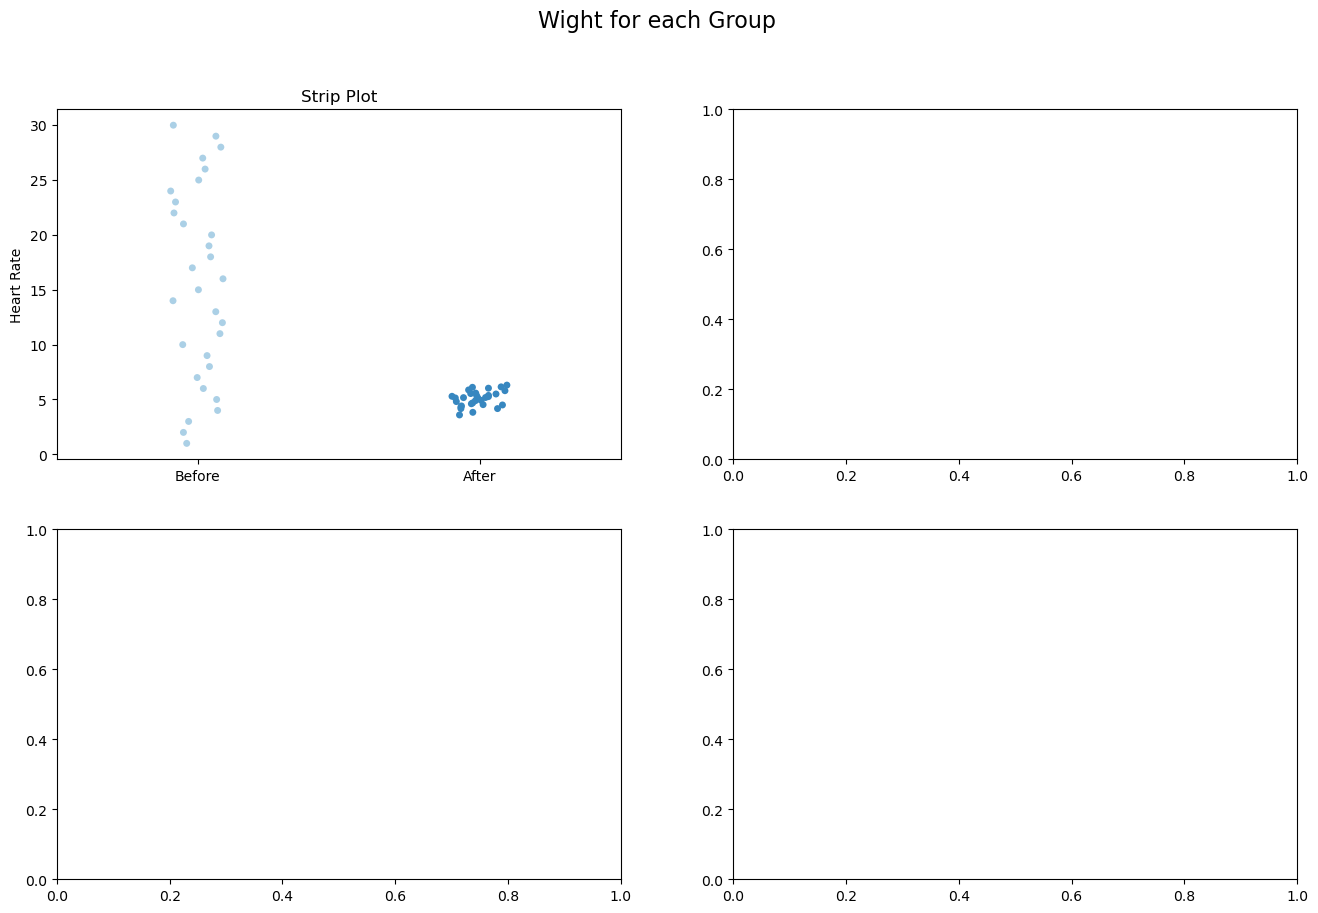

In [ ]:
# Create box plot, violin plot, and scatter plot of the data and overlapping them for a better comparison 


# Set up the figure with 2x2 grid of subplots and adjust the figure size
# https://matplotlib.org/stable/users/explain/axes/axes_intro.html
fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # Creates a 2x2 grid of subplots with a figure size of 12x12 inches

# Set the title for the entire figure
plt.suptitle('Wight for each Group', fontsize=16)  # Adds a title for the whole figure

# Plot 1: Strip plot
# https://datagy.io/seaborn-stripplot/
sns.stripplot(data=df[''], palette='Blues', ax=axs[0, 0])  # Creates a strip plot using the 'Blues' color palette for the data
axs[0, 0].set_title('Strip Plot', fontsize=12)  
axs[0, 0].set_ylabel('Heart Rate') 
axs[0, 0].set_xticks([0, 1])  # Set tick positions on the x-axis at 0 and 1
axs[0, 0].set_xticklabels(['Before', 'After'])  # Set custom labels for the x-axis ticks

# Plot 2: Box plot
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(data=data, palette='Set2', ax=axs[0, 1])  # Creates a box plot with 'Set2' color palette for the data
axs[0, 1].set_title('Box Plot', fontsize=12)  
axs[0, 1].set_ylabel('Heart Rate')  
axs[0, 1].set_xticks([0, 1])  
axs[0, 1].set_xticklabels(['Before', 'After'])  

# Plot 3: Violin plot
sns.violinplot(data=data, palette='RdBu', ax=axs[1, 0])  # Creates a violin plot with the 'RdBu' color palette
axs[1, 0].set_title('Violin Plot', fontsize=12)  
axs[1, 0].set_ylabel('Heart Rate')  
axs[1, 0].set_xticks([0, 1])  
axs[1, 0].set_xticklabels(['Before', 'After'])  

# Plot 4: Combined Violin, Box, and Strip Plot
# This plot combines all three types (Violin, Box, and Strip) for comparison
sns.violinplot(data=data, palette='Blues', ax=axs[1, 1], inner=None, alpha=0.5)  
sns.boxplot(data=data, palette='Set2', ax=axs[1, 1], 
            boxprops=dict(alpha=0.4))  
sns.stripplot(data=data, ax=axs[1, 1], color='black', alpha=0.6)  # Black color for a better visualization
axs[1, 1].set_title('Violin + Box + Strip Plot', fontsize=12)  # Title for the combined plot
axs[1, 1].set_ylabel('Heart Rate')  
axs[1, 1].set_xticks([0, 1])
axs[1, 1].set_xticklabels(['Before', 'After'])  

# Adjust the layout to prevent overlapping of elements and leave space for the main title
# https://stackoverflow.com/questions/66442402/matplotlib-with-fig-text-cropped
# https://datagy.io/seaborn-stripplot/
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to prevent overlapping and leave space for the title

# Show the plot
plt.show()